In [80]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [81]:
df_train = pd.read_csv('test.csv')
df_test = pd.read_csv('test.csv')
df_tutorial = pd.read_csv('housing.csv')

In [82]:
for i,one in enumerate(df_train['date']):
    df_train['date'][i] = one[:8]

In [83]:
df_tutorial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [84]:
df_train["grade"].value_counts()

7     2701
8     1843
9      754
6      611
10     350
11     108
5       62
12      28
4        6
13       4
3        1
Name: grade, dtype: int64

In [85]:
df_tutorial.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


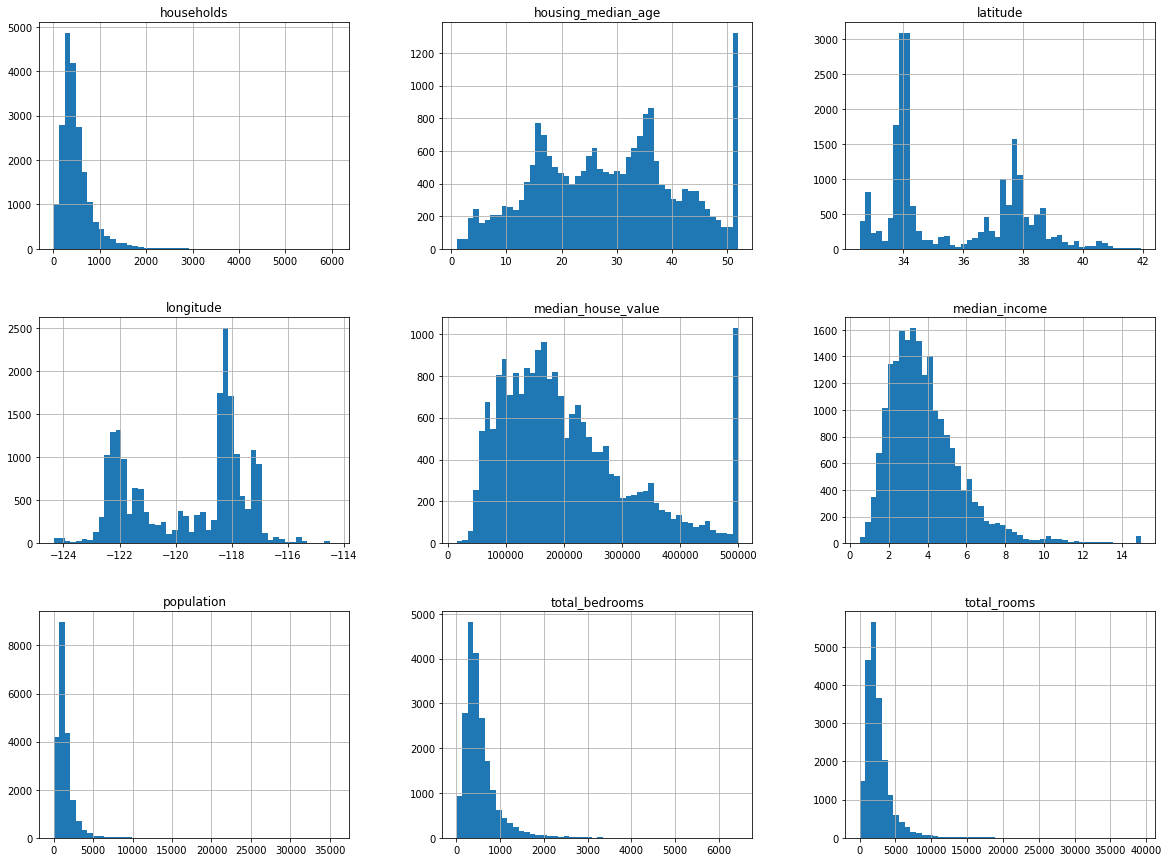

In [86]:
df_tutorial.hist(bins=50, figsize=(20,15))
plt.show()

In [87]:
def split_train_test(data,test_ratio):
    np.random.seed(2019)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indicies = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indicies]

In [88]:
tutorial_train,tutorial_test = split_train_test(df_tutorial,0.2)

In [89]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 **32

def split_train_test_by_id(data, test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [92]:
housing_with_id = df_tutorial.reset_index()
tutorial_train,tutorial_test =  split_train_test_by_id(housing_with_id,0.2,"index")

In [110]:
housing_with_id["id"] = df_tutorial["longitude"]*1000+ df_tutorial["latitude"]

In [124]:
from sklearn.model_selection import train_test_split
tutorial_train,tutorial_test = train_test_split(df_tutorial,test_size=0.2,random_state=2019)

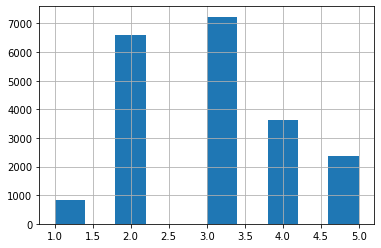

In [162]:
df_tutorial["income_cat"] = pd.cut(df_tutorial["median_income"],
                                  bins=[0,1.5,3,4.5,6,np.inf], labels=[1,2,3,4,5])
df_tutorial["income_cat"] .hist()

In [137]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
tutorial_split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=2019)
for train_index,test_index in tutorial_split.split(df_tutorial,df_tutorial["income_cat"]):
    strat_train_set = df_tutorial.loc[train_index]
    strat_test_set = df_tutorial.loc[test_index]

In [144]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [191]:
strat_train_set.drop("income_cat",axis=1,inplace=True)

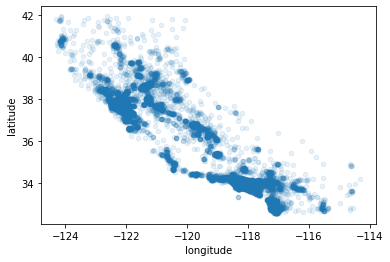

In [197]:
strat_train_set.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

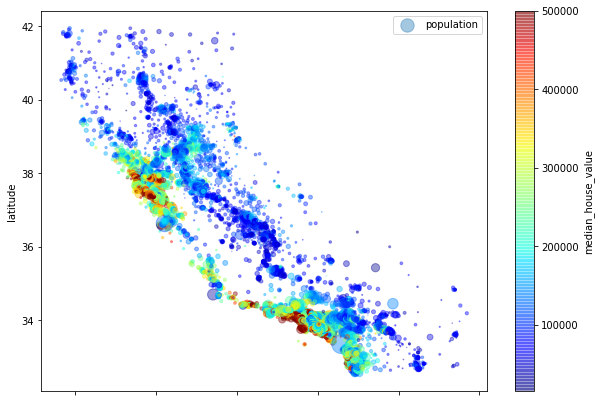

In [205]:
df_tutorial.plot(kind="scatter", 
                 x="longitude",
                 y="latitude",
                 alpha=0.4,
                 s = df_tutorial["population"]/100, 
                 label = "population", 
                 figsize=(10,7), 
                 c ="median_house_value",
                 cmap=plt.get_cmap("jet"),
                 colorbar=True)
plt.legend()